In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import astropy.constants as ct

In [2]:
def density_integrand(x):
    return (x**2)/(np.exp(x)+1.0)

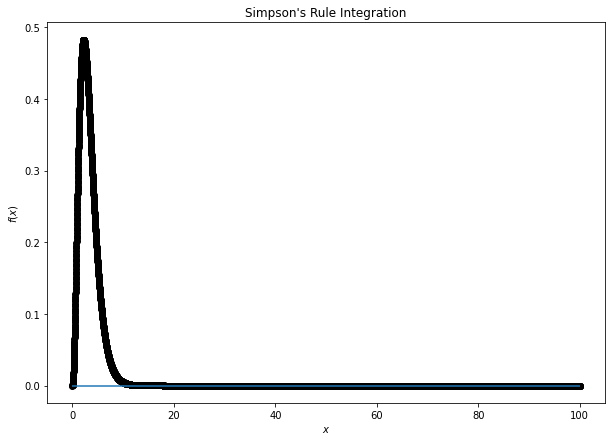

The result of the numerical integration of the discretely-sampled function
between x = 0 and x = 100.0 is I = -1.80308535


In [3]:
# data
x = np.linspace(0,100,10000)
f = density_integrand(x)

N = len(x)
n = N-1

plt.figure(figsize=(10,7))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h = x[2*i] - x[2*i+1]
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson\'s Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.0f} and x = {x[len(x)-1]:.1f} is I = {Integral:.8f}')

In [4]:
T = 1e9
n_pm = -Integral*8*np.pi*((ct.sigma_sb*T)/(2*np.pi*ct.hbar*ct.c))**3
n_pm

<Quantity 1.05404987e+81 W3 / (J3 K12 m9)>

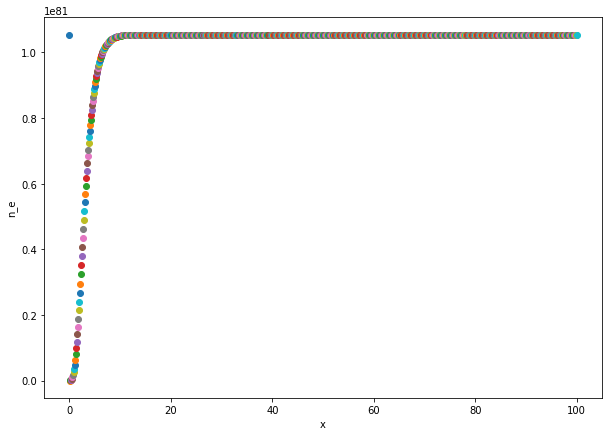

In [46]:
sigma = 5.67037442e-08
hbar = 1.05457182e-34
c = 299792458

l = 100
ll = np.linspace(0,l,1000)
ne = np.zeros(l*l)

plt.figure(figsize=(10,7))

for i in ll:
    ne[int(10*i)] = -Integral*8*np.pi*((sigma*T)/(2*np.pi*hbar*c))**3
    plt.scatter(i,-Integral*8*np.pi*((sigma*T)/(2*np.pi*hbar*c))**3)
    
    x = np.linspace(0,i,1000)
    f = density_integrand(x)

    N = len(x)
    n = N-1

    # Numerical integration loop
    Integral = 0.
    for i in range(int((n-2)/2 +1)):
        h = x[2*i] - x[2*i+1]
        Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3


plt.xlabel('x')
plt.ylabel('n_e')
plt.show()

In [47]:
print(ne,ne.shape)

[ 1.05405035e+81 -0.00000000e+00  9.37783230e+76 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00] (10000,)


In [48]:
mask = np.ones(len(ne),dtype=bool)
mask[ne == 0.0e0] = False
result = ne[mask]
print(result,result.shape) 

[1.05405035e+81 9.37783230e+76 7.21110931e+77 2.33613438e+78
 5.30840370e+78 9.92636030e+78 1.64019891e+79 2.48764835e+79
 3.54267063e+79 4.80722195e+79 6.27826486e+79 7.94851606e+79
 9.80718482e+79 1.18406843e+80 1.40333014e+80 1.63678125e+80
 1.88260398e+80 2.13893405e+80 2.40390290e+80 2.67567326e+80
 2.95246819e+80 3.23259424e+80 3.51445890e+80 3.79658332e+80
 4.07761058e+80 4.35631025e+80 4.63157985e+80 4.90244375e+80
 5.16804992e+80 5.42766520e+80 5.68066921e+80 5.92654754e+80
 6.16488430e+80 6.39535433e+80 6.61771543e+80 6.83180043e+80
 7.03750968e+80 7.23480359e+80 7.42369570e+80 7.60424604e+80
 7.77655496e+80 7.94075739e+80 8.09701758e+80 8.24552430e+80
 8.38648641e+80 8.52012895e+80 8.64668957e+80 8.76641536e+80
 8.87956003e+80 8.98638146e+80 9.08713949e+80 9.18209409e+80
 9.27150367e+80 9.35562371e+80 9.43470562e+80 9.50899568e+80
 9.57873428e+80 9.64415523e+80 9.70548525e+80 9.76294355e+80
 9.81674155e+80 9.86708265e+80 9.91416214e+80 9.95816712e+80
 9.99927652e+80 1.003766

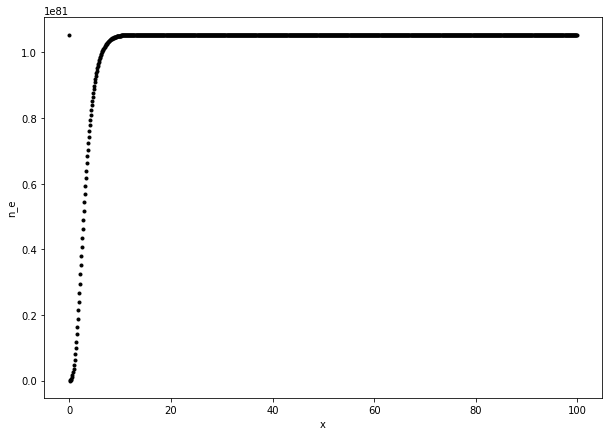

In [49]:
plt.figure(figsize=(10,7))
plt.plot(x[:999],result,'.k')
plt.xlabel('x')
plt.ylabel('n_e')
plt.show()

In [51]:
DeltaE = 5
dnedE = result/DeltaE

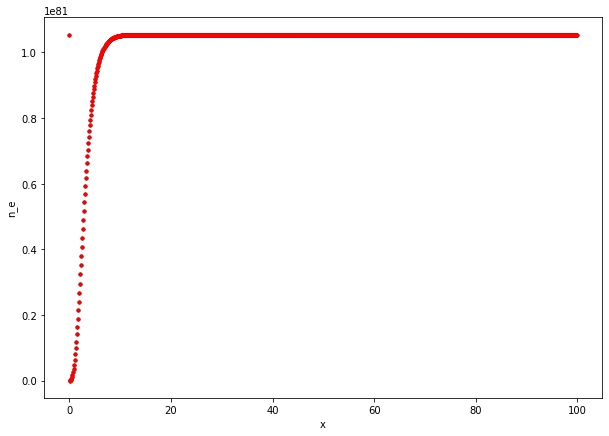

In [52]:
original_result = dnedE*DeltaE 
plt.figure(figsize=(10,7))
plt.plot(x[:999],result,'.k')
plt.plot(x[:999],original_result,'.r')
plt.xlabel('x')
plt.ylabel('n_e')
plt.show()